In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Classe Model
class SimpleLinearRegression:
    def __init__(self):
        self.theta0 = 0   # Init des paramètres
        self.theta1 = 0  

    def fit(self, X, y, learning_rate=0.01, iterations=1000):
        m = len(X)
        for iteration in range(iterations):
            
            predictions = self.theta0 + self.theta1 * X
            error = predictions - y
            
            gradient_theta0 = (1 / m) * np.sum(error)
            gradient_theta1 = (1 / m) * np.sum(error * X)
            
            self.theta0 -= learning_rate * gradient_theta0
            self.theta1 -= learning_rate * gradient_theta1


    def predict(self, X):
        return self.theta0 + self.theta1 * X

In [3]:
data_df = pd.read_csv('data.csv')
data_df.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


In [4]:
mileage = data_df['km'].values
price = data_df['price'].values

In [5]:
mileage_scaled = (mileage - np.mean(mileage)) / np.std(mileage)
print(mileage_scaled)

[ 2.69433217  0.75116081  0.95866514  1.6379994   1.4531848   0.26633762
  1.27476986 -0.23399991  0.84230757 -0.33096455 -0.36918801 -0.73705246
 -0.52489383 -0.06916003 -0.66064432 -0.48562315 -1.02455261 -0.1564282
 -0.77799093 -0.68635935 -0.91275238 -0.63155493 -1.51589183 -0.76170087]


In [6]:
model = SimpleLinearRegression()
model.fit(mileage_scaled, price, learning_rate=0.1, iterations=10000)

In [7]:
mileage_test = np.array([100000, 10000, 1000, 100, 10, 1])  
mileage_test_scaled = (mileage_test - np.mean(mileage)) / np.std(mileage)  

predictions = model.predict(mileage_test_scaled)

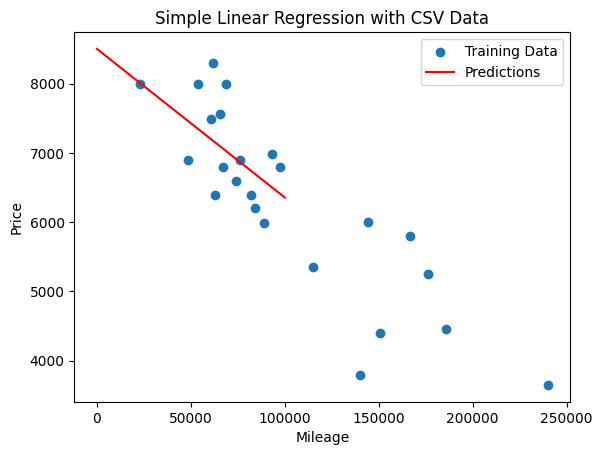

In [8]:
# Plotting the data and regression line
plt.scatter(mileage, price, label='Training Data')
plt.plot(mileage_test, predictions, color='red', label='Predictions')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Simple Linear Regression with CSV Data')
plt.legend()
plt.show()